In [1]:
import pandas as pd


In [69]:
file = "G://My Drive/Code/IAA_TIPS/Copy of MSA 2023 STUDENT TIPS spreadsheet.xlsx"
data = pd.read_excel(file, sheet_name="2017")




pull out each column into its own frame and drop null
then make a single text string

In [133]:
#data_1 = data["TIP #1"]
#data_2 = data["TIP #2"]
##data_3=data["TIP #3"]
#data_4=data["Anything else you want to mention?"]
group = pd.concat([data["TIP #1"],data["TIP #2"],data["TIP #3"],data["Anything else you want to mention?"]],ignore_index=True,axis=0)
group.dropna(inplace=True)
text = ''
for row, item in group.iteritems():
    text = item + text
#print(text)

Treat this like a job. It is.Given the rigors of the course, it might be challenging, but try to have an outlet for dealing with stress. You need to be mentally and physically healthy for yourself, family, and teammates.  Have fun! Take risks! Remember, no one is paying you yet- don't be afraid to get creative and make mistakes!Be nice and help your classmates. Be ready to learn about analytics and yourself during this program!When you're facing a problem on homework or in practicum, don't go to the faculty as your first resource. Try to solve the problem on your own or with other members of your team (like you'll have to do after the program). Only go to faculty members when you've hit a wall that you can't get through.Enjoy the experience, it goes by really fast!Talk to other students about everything. You're never going through anything alone. 119 other people are doing the exact same thing. If you're stressed about school, the job search, or your practicum, someone else is too, gua

In [160]:
import nltk
from nltk.collocations import *
from nltk.collocations import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()
#http://librarycarpentry.org/lc-tdm/12-collocations/index.html
#https://www.nltk.org/howto/collocations.html
import re


In [192]:
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.probability import FreqDist


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ztweb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [187]:
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + list([').'] + list(['!!!'])))
#print(remove_these)
tokens = nltk.wordpunct_tokenize(text)
new_word = ''
for word in tokens:
    if word not in remove_these:
        new_word = new_word +' '+ word.lower()
print(new_word)   
# shorter way 
# filtered_text = [w for w in tokens if not w in remove_these] #http://librarycarpentry.org/lc-tdm/aio/index.html

 treat like job it given rigors course might challenging try outlet dealing stress you need mentally physically healthy family teammates have fun take risks remember one paying yet afraid get creative make mistakes be nice help classmates be ready learn analytics program when facing problem homework practicum go faculty first resource try solve problem members team like program only go faculty members hit wall get enjoy experience goes really fast talk students everything you never going anything alone 119 people exact thing if stressed school job search practicum someone else guaranteed try identify solid confidants talk things get tough share exciting things well the whole year one big glass case emotions enjoy ride have fun believe program fly take time enjoy working alongside incredibly talented teammates wonderful program do fun things groups life better people take time make friends there closed form solutionbring team snacks make sure keep life balanced throughout program find p

In [210]:
#punct = re.compile("[^\w\s]") #https://likegeeks.com/python-remove-punctuation/
#new_text = re.sub(punct,"",text)
tokens = nltk.wordpunct_tokenize(new_word)

finder = BigramCollocationFinder.from_words(tokens) #https://www.nltk.org/howto/collocations.html
#finder.apply_word_filter(lambda w: w in ('and','And', 'the' , 'a', 'also'))

#scored = finder.score_ngrams(bigram_measures.raw_freq)
#sorted(bigram for bigram, score in scored)
bigram_measures = BigramAssocMeasures()
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.likelihood_ratio, 10)

[('make', 'sure'),
 ('job', 'search'),
 ('interview', 'season'),
 ('get', 'know'),
 ('pay', 'attention'),
 ('e', 'g'),
 ('udemy', 'coursera'),
 ('feel', 'like'),
 ('take', 'advantage'),
 ('team', 'members')]

In [193]:
fdist = FreqDist(tokens)
fdist



FreqDist({'time': 38, 'get': 35, 'work': 31, 'program': 30, 'you': 27, 'team': 27, 'make': 26, 'learn': 26, 'take': 25, 'try': 24, ...})

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ztweb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


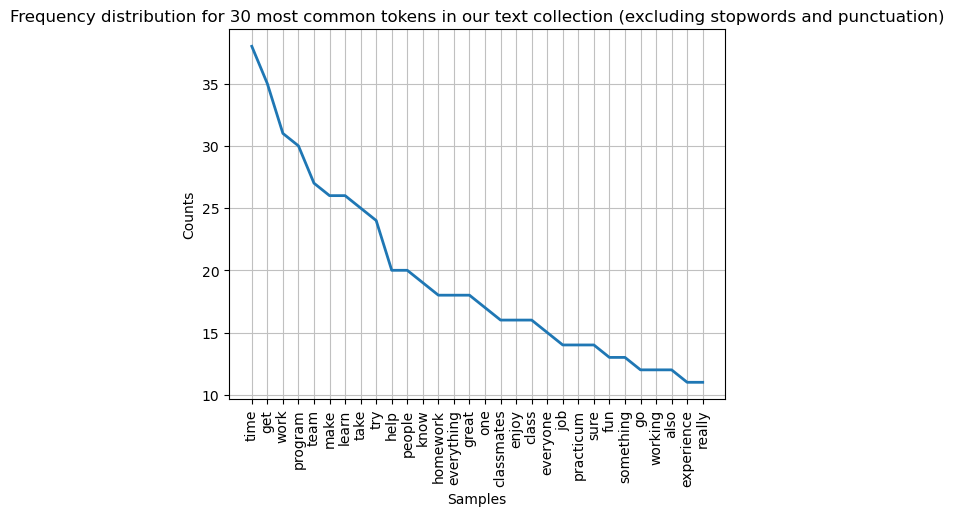

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [194]:
filtered_text = [w for w in tokens if not w in remove_these]
fdist_filtered = FreqDist(filtered_text)
fdist_filtered.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')


In [197]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


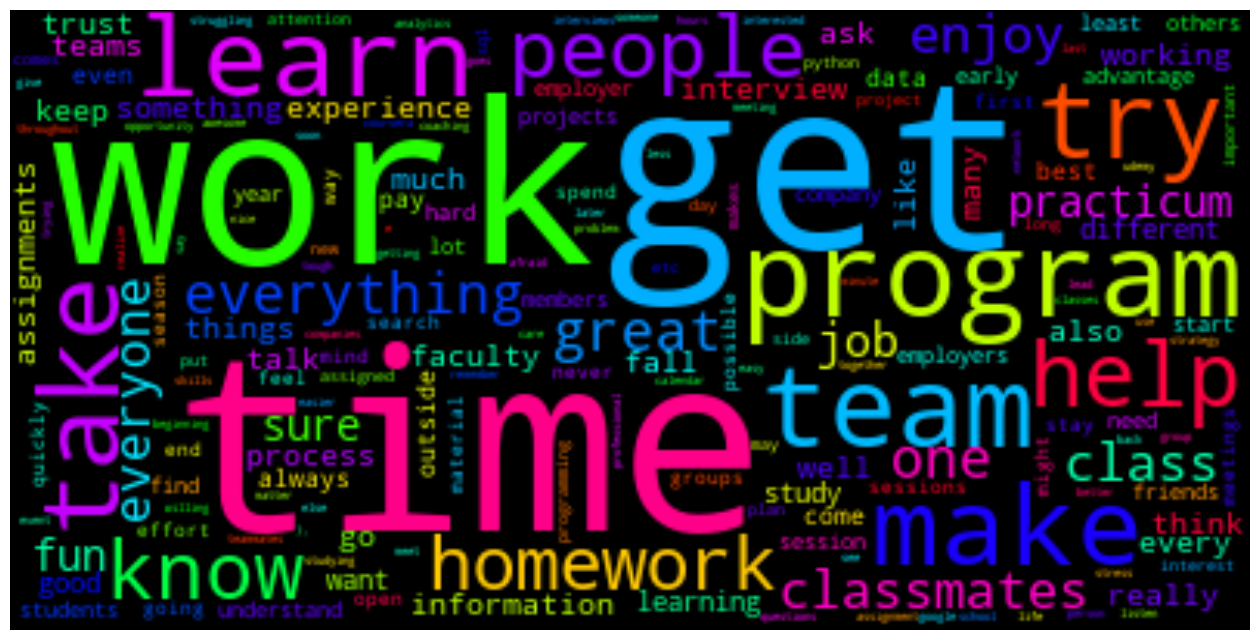

In [198]:
from collections import Counter
dictionary=Counter(filtered_text)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()
